In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Consumer_Train.csv')

In [ ]:
dataset = pd .DataFrame(data)
dataset.head(2)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,1/31/2020,Credit card or prepaid card,General-purpose credit card or charge card,"Other features, terms, or problems",Problem with rewards from credit card,I had three credit cards with Barclays. An UBE...,Company has responded to the consumer and the ...,BARCLAYS BANK DELAWARE,GA,300XX,NaN,Consent provided,Web,1/31/2020,Closed with monetary relief,Yes,NaN,3516488
1,4/20/2020,Credit card or prepaid card,Store credit card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,I purchased furniture from Macy 's. The produc...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",MD,210XX,Servicemember,Consent provided,Web,4/22/2020,Closed with monetary relief,Yes,NaN,3614033


In [ ]:
dataset = dataset.drop(['Company','State','Tags','Submitted via','Complaint ID','ZIP code','Consumer disputed?','Date received','Date sent to company'],axis = 1)
dataset.head(20)

,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Consumer consent provided?,Company response to consumer,Timely response?
0,Credit card or prepaid card,General-purpose credit card or charge card,"Other features, terms, or problems",Problem with rewards from credit card,I had three credit cards with Barclays. An UBE...,Company has responded to the consumer and the ...,Consent provided,Closed with monetary relief,Yes
1,Credit card or prepaid card,Store credit card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,I purchased furniture from Macy 's. The produc...,Company has responded to the consumer and the ...,Consent provided,Closed with monetary relief,Yes
2,Checking or savings account,Checking account,Managing an account,Deposits and withdrawals,I deposited a {$800.00} check to Chase from my...,NaN,Consent provided,Closed with explanation,Yes
3,Debt collection,Credit card debt,Attempts to collect debt not owed,Debt was already discharged in bankruptcy and ...,Id like to file a complaint against Bank of Am...,Company has responded to the consumer and the ...,Consent provided,Closed with explanation,Yes
4,Debt collection,Other debt,Attempts to collect debt not owed,Debt is not yours,I Have contacted Credit Bureaus on numerous oc...,Company has responded to the consumer and the ...,Consent provided,Closed with explanation,Yes
5,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,Sent letter requesting verification to this co...,Company disputes the facts presented in the co...,Consent provided,Closed with non-monetary relief,Yes
6,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,I had previously reported these as fraud : XX/...,Company has responded to the consumer and the ...,Consent provided,Closed with non-monetary relief,Yes
7,Student loan,Federal student loan servicing,Dealing with your lender or servicer,Received bad information about your loan,In XX/XX/XXXX my wife ( at the time ) and I de...,NaN,Consent provided,Closed with explanation,Yes
8,Mortgage,Conventional home mortgage,Applying for a mortgage or refinancing an exis...,NaN,"I have a mortgage with Caliber Home Loans, and...",NaN,Consent provided,Closed with explanation,Yes
9,Student loan,Private student loan,Dealing with your lender or servicer,Problem with customer service,I started going to school at XXXX College in X...,NaN,Consent provided,Closed with explanation,Yes


In [ ]:
features_with_null_values=[features for features in dataset.columns if dataset[features].isnull().sum()>1]
print(features_with_null_values)

['Sub-issue', 'Company public response']


In [ ]:
dataset['Sub-issue'].fillna(dataset['Sub-issue'].mode()[0], inplace=True)
dataset['Company public response'].fillna(dataset['Company public response'].mode()[0], inplace=True)


In [ ]:
dataset.head(20
             )


,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Consumer consent provided?,Company response to consumer,Timely response?
0,Credit card or prepaid card,General-purpose credit card or charge card,"Other features, terms, or problems",Problem with rewards from credit card,I had three credit cards with Barclays. An UBE...,Company has responded to the consumer and the ...,Consent provided,Closed with monetary relief,Yes
1,Credit card or prepaid card,Store credit card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,I purchased furniture from Macy 's. The produc...,Company has responded to the consumer and the ...,Consent provided,Closed with monetary relief,Yes
2,Checking or savings account,Checking account,Managing an account,Deposits and withdrawals,I deposited a {$800.00} check to Chase from my...,Company has responded to the consumer and the ...,Consent provided,Closed with explanation,Yes
3,Debt collection,Credit card debt,Attempts to collect debt not owed,Debt was already discharged in bankruptcy and ...,Id like to file a complaint against Bank of Am...,Company has responded to the consumer and the ...,Consent provided,Closed with explanation,Yes
4,Debt collection,Other debt,Attempts to collect debt not owed,Debt is not yours,I Have contacted Credit Bureaus on numerous oc...,Company has responded to the consumer and the ...,Consent provided,Closed with explanation,Yes
5,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,Sent letter requesting verification to this co...,Company disputes the facts presented in the co...,Consent provided,Closed with non-monetary relief,Yes
6,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,I had previously reported these as fraud : XX/...,Company has responded to the consumer and the ...,Consent provided,Closed with non-monetary relief,Yes
7,Student loan,Federal student loan servicing,Dealing with your lender or servicer,Received bad information about your loan,In XX/XX/XXXX my wife ( at the time ) and I de...,Company has responded to the consumer and the ...,Consent provided,Closed with explanation,Yes
8,Mortgage,Conventional home mortgage,Applying for a mortgage or refinancing an exis...,Debt is not yours,"I have a mortgage with Caliber Home Loans, and...",Company has responded to the consumer and the ...,Consent provided,Closed with explanation,Yes
9,Student loan,Private student loan,Dealing with your lender or servicer,Problem with customer service,I started going to school at XXXX College in X...,Company has responded to the consumer and the ...,Consent provided,Closed with explanation,Yes


In [ ]:
dataset.shape

(45962, 9)

In [ ]:
mapping = {
    'Closed with monetary relief': 4,
    'Closed with explanation': 5,
    'Closed with non-monetary relief':3,
    'Untimely response': 1,
    'In progress': 2
}
dataset['Rating'] = dataset['Company response to consumer'].map(mapping)

In [ ]:
dataset

,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Consumer consent provided?,Company response to consumer,Timely response?,Rating
0,Credit card or prepaid card,General-purpose credit card or charge card,"Other features, terms, or problems",Problem with rewards from credit card,I had three credit cards with Barclays. An UBE...,Company has responded to the consumer and the ...,Consent provided,Closed with monetary relief,Yes,4
1,Credit card or prepaid card,Store credit card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,I purchased furniture from Macy 's. The produc...,Company has responded to the consumer and the ...,Consent provided,Closed with monetary relief,Yes,4
2,Checking or savings account,Checking account,Managing an account,Deposits and withdrawals,I deposited a {$800.00} check to Chase from my...,Company has responded to the consumer and the ...,Consent provided,Closed with explanation,Yes,5
3,Debt collection,Credit card debt,Attempts to collect debt not owed,Debt was already discharged in bankruptcy and ...,Id like to file a complaint against Bank of Am...,Company has responded to the consumer and the ...,Consent provided,Closed with explanation,Yes,5
4,Debt collection,Other debt,Attempts to collect debt not owed,Debt is not yours,I Have contacted Credit Bureaus on numerous oc...,Company has responded to the consumer and the ...,Consent provided,Closed with explanation,Yes,5
...,...,...,...,...,...,...,...,...,...,...
45957,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,The debt collector is attempting to collect a ...,Company has responded to the consumer and the ...,Consent provided,Closed with explanation,Yes,5
45958,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,"Monday, XX/XX/2020 at approximately XXXX XXXX ...",Company has responded to the consumer and the ...,Consent provided,Closed with explanation,Yes,5
45959,Debt collection,Other debt,Attempts to collect debt not owed,Debt was result of identity theft,I called Credit Control Corp and explained tha...,Company believes it acted appropriately as aut...,Consent provided,Closed with explanation,Yes,5
45960,Mortgage,Conventional home mortgage,Trouble during payment process,Debt is not yours,This company is a nightmare with the escrow ac...,Company has responded to the consumer and the ...,Consent provided,Closed with explanation,Yes,5


In [ ]:
import tensorflow as tf
from tensorflow import keras


from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer

sentences = [ phrase for phrase in dataset['Sub-issue']

]
labels = [phrase for phrase in dataset['Rating']]

tokenizer = Tokenizer(num_words = 100,oov_token="<OOV>")
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index

sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences,padding =  'post',truncating = 'post', maxlen=10)
print(padded)

[[12 15  1 ...  0  0  0]
 [16  9 20 ... 19 11 24]
 [60 37 55 ...  0  0  0]
 ...
 [ 2 10 23 ...  0  0  0]
 [ 2  4  3 ...  0  0  0]
 [ 2 10 36 ...  0  0  0]]


In [ ]:
print(padded.shape)

(45962, 10)


In [ ]:
training_size = 35000
test_size =10962

In [ ]:
training_sentences = sentences[0:training_size]

In [ ]:
testing_sentences = sentences[0:test_size]
vocab_size = 10000
embedding_dim = 16
max_length = 100
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_size = 35000


In [ ]:
training_labels = labels[0:training_size]
testing_labels = labels[0:test_size]

In [ ]:
tokenizer = Tokenizer(num_words=vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(training_sentences)

word_index = tokenizer.word_index

training_sequences = tokenizer.texts_to_sequences(training_sentences)
training_padded = pad_sequences(training_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

testing_sequences = tokenizer.texts_to_sequences(testing_sentences)
testing_padded = pad_sequences(testing_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

In [ ]:
import numpy as np
training_padded = np.array(training_padded)
training_labels = np.array(training_labels)
testing_padded = np.array(testing_padded)
testing_labels = np.array(testing_labels)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 100, 16)           160000    
                                                                 
 global_average_pooling1d_3   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_6 (Dense)             (None, 24)                408       
                                                                 
 dense_7 (Dense)             (None, 1)                 25        
                                                                 
Total params: 160,433
Trainable params: 160,433
Non-trainable params: 0
_________________________________________________________________


In [ ]:
num_epochs = 30
history = model.fit(training_padded, training_labels, epochs=num_epochs, validation_data=(testing_padded, testing_labels), verbose=2)

Epoch 1/30
1094/1094 - 19s - loss: -1.9164e+03 - accuracy: 0.0084 - val_loss: -7.4966e+03 - val_accuracy: 0.0077 - 19s/epoch - 17ms/step
Epoch 2/30
1094/1094 - 7s - loss: -2.4894e+04 - accuracy: 0.0084 - val_loss: -4.9625e+04 - val_accuracy: 0.0077 - 7s/epoch - 6ms/step
Epoch 3/30
1094/1094 - 6s - loss: -9.0707e+04 - accuracy: 0.0084 - val_loss: -1.4052e+05 - val_accuracy: 0.0077 - 6s/epoch - 6ms/step
Epoch 4/30
1094/1094 - 6s - loss: -2.0919e+05 - accuracy: 0.0084 - val_loss: -2.8750e+05 - val_accuracy: 0.0077 - 6s/epoch - 5ms/step
Epoch 5/30
1094/1094 - 5s - loss: -3.8688e+05 - accuracy: 0.0084 - val_loss: -4.9668e+05 - val_accuracy: 0.0077 - 5s/epoch - 4ms/step
Epoch 6/30
1094/1094 - 6s - loss: -6.3007e+05 - accuracy: 0.0084 - val_loss: -7.7457e+05 - val_accuracy: 0.0077 - 6s/epoch - 5ms/step
Epoch 7/30
1094/1094 - 5s - loss: -9.4533e+05 - accuracy: 0.0084 - val_loss: -1.1278e+06 - val_accuracy: 0.0077 - 5s/epoch - 5ms/step
Epoch 8/30
1094/1094 - 6s - loss: -1.3392e+06 - accuracy: 0

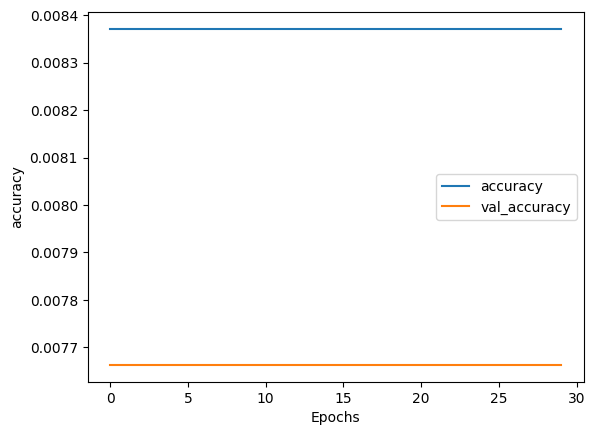

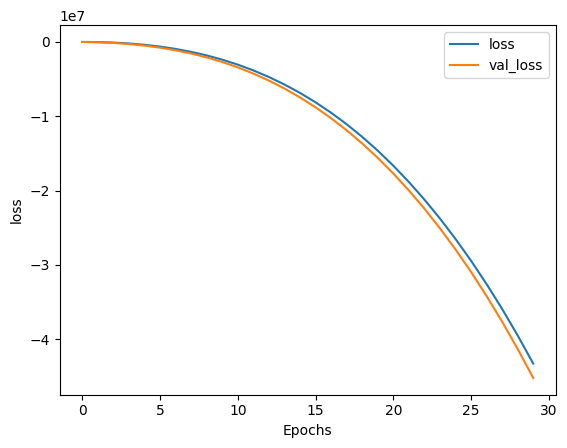

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
#apllying on test datset


In [ ]:
data_test = pd.read_csv('/content/drive/MyDrive/Consumer_Test.csv')

In [ ]:
dataset_1= pd .DataFrame(data)
dataset_1.head(2)

,Date received,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Company,State,ZIP code,Tags,Consumer consent provided?,Submitted via,Date sent to company,Company response to consumer,Timely response?,Consumer disputed?,Complaint ID
0,1/31/2020,Credit card or prepaid card,General-purpose credit card or charge card,"Other features, terms, or problems",Problem with rewards from credit card,I had three credit cards with Barclays. An UBE...,Company has responded to the consumer and the ...,BARCLAYS BANK DELAWARE,GA,300XX,NaN,Consent provided,Web,1/31/2020,Closed with monetary relief,Yes,NaN,3516488
1,4/20/2020,Credit card or prepaid card,Store credit card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,I purchased furniture from Macy 's. The produc...,Company has responded to the consumer and the ...,"CITIBANK, N.A.",MD,210XX,Servicemember,Consent provided,Web,4/22/2020,Closed with monetary relief,Yes,NaN,3614033


In [ ]:
dataset_1= dataset_1.drop(['Company','State','Tags','Submitted via','Complaint ID','ZIP code','Consumer disputed?','Date received','Date sent to company'],axis = 1)
dataset_1.head(20)

,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Consumer consent provided?,Company response to consumer,Timely response?
0,Credit card or prepaid card,General-purpose credit card or charge card,"Other features, terms, or problems",Problem with rewards from credit card,I had three credit cards with Barclays. An UBE...,Company has responded to the consumer and the ...,Consent provided,Closed with monetary relief,Yes
1,Credit card or prepaid card,Store credit card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,I purchased furniture from Macy 's. The produc...,Company has responded to the consumer and the ...,Consent provided,Closed with monetary relief,Yes
2,Checking or savings account,Checking account,Managing an account,Deposits and withdrawals,I deposited a {$800.00} check to Chase from my...,NaN,Consent provided,Closed with explanation,Yes
3,Debt collection,Credit card debt,Attempts to collect debt not owed,Debt was already discharged in bankruptcy and ...,Id like to file a complaint against Bank of Am...,Company has responded to the consumer and the ...,Consent provided,Closed with explanation,Yes
4,Debt collection,Other debt,Attempts to collect debt not owed,Debt is not yours,I Have contacted Credit Bureaus on numerous oc...,Company has responded to the consumer and the ...,Consent provided,Closed with explanation,Yes
5,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,Sent letter requesting verification to this co...,Company disputes the facts presented in the co...,Consent provided,Closed with non-monetary relief,Yes
6,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,I had previously reported these as fraud : XX/...,Company has responded to the consumer and the ...,Consent provided,Closed with non-monetary relief,Yes
7,Student loan,Federal student loan servicing,Dealing with your lender or servicer,Received bad information about your loan,In XX/XX/XXXX my wife ( at the time ) and I de...,NaN,Consent provided,Closed with explanation,Yes
8,Mortgage,Conventional home mortgage,Applying for a mortgage or refinancing an exis...,NaN,"I have a mortgage with Caliber Home Loans, and...",NaN,Consent provided,Closed with explanation,Yes
9,Student loan,Private student loan,Dealing with your lender or servicer,Problem with customer service,I started going to school at XXXX College in X...,NaN,Consent provided,Closed with explanation,Yes


In [ ]:
dataset_1['Sub-issue'].fillna(dataset_1['Sub-issue'].mode()[0], inplace=True)
dataset_1['Company public response'].fillna(dataset_1['Company public response'].mode()[0], inplace=True)

In [ ]:
mapping = {
    'Closed with monetary relief': 4,
    'Closed with explanation': 5,
    'Closed with non-monetary relief':3,
    'Untimely response': 1,
    'In progress': 2
}
dataset_1['Rating'] = dataset_1['Company response to consumer'].map(mapping)


In [ ]:
dataset_1

,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Consumer consent provided?,Company response to consumer,Timely response?,Rating
0,Credit card or prepaid card,General-purpose credit card or charge card,"Other features, terms, or problems",Problem with rewards from credit card,I had three credit cards with Barclays. An UBE...,Company has responded to the consumer and the ...,Consent provided,Closed with monetary relief,Yes,4
1,Credit card or prepaid card,Store credit card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,I purchased furniture from Macy 's. The produc...,Company has responded to the consumer and the ...,Consent provided,Closed with monetary relief,Yes,4
2,Checking or savings account,Checking account,Managing an account,Deposits and withdrawals,I deposited a {$800.00} check to Chase from my...,Company has responded to the consumer and the ...,Consent provided,Closed with explanation,Yes,5
3,Debt collection,Credit card debt,Attempts to collect debt not owed,Debt was already discharged in bankruptcy and ...,Id like to file a complaint against Bank of Am...,Company has responded to the consumer and the ...,Consent provided,Closed with explanation,Yes,5
4,Debt collection,Other debt,Attempts to collect debt not owed,Debt is not yours,I Have contacted Credit Bureaus on numerous oc...,Company has responded to the consumer and the ...,Consent provided,Closed with explanation,Yes,5
...,...,...,...,...,...,...,...,...,...,...
45957,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,The debt collector is attempting to collect a ...,Company has responded to the consumer and the ...,Consent provided,Closed with explanation,Yes,5
45958,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,"Monday, XX/XX/2020 at approximately XXXX XXXX ...",Company has responded to the consumer and the ...,Consent provided,Closed with explanation,Yes,5
45959,Debt collection,Other debt,Attempts to collect debt not owed,Debt was result of identity theft,I called Credit Control Corp and explained tha...,Company believes it acted appropriately as aut...,Consent provided,Closed with explanation,Yes,5
45960,Mortgage,Conventional home mortgage,Trouble during payment process,Debt is not yours,This company is a nightmare with the escrow ac...,Company has responded to the consumer and the ...,Consent provided,Closed with explanation,Yes,5


In [ ]:
sentence_1 = [phrase for phrase in dataset_1['Sub-issue']]
sequences = tokenizer.texts_to_sequences(sentence_1)
padded = pad_sequences(sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
print(model.predict(padded))
df_5 = pd.DataFrame(model.predict(padded))


1437/1437 [==============================] - 4s 3ms/step
[[1.]
 [1.]
 [1.]
 ...
 [1.]
 [1.]
 [1.]]
1437/1437 [==============================] - 2s 2ms/step


In [ ]:
from sklearn.metrics import f1_score
f1_score = ()

In [ ]:
df_5.head()

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0


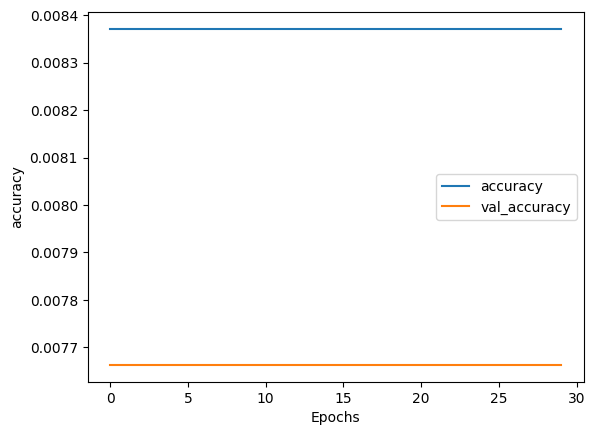

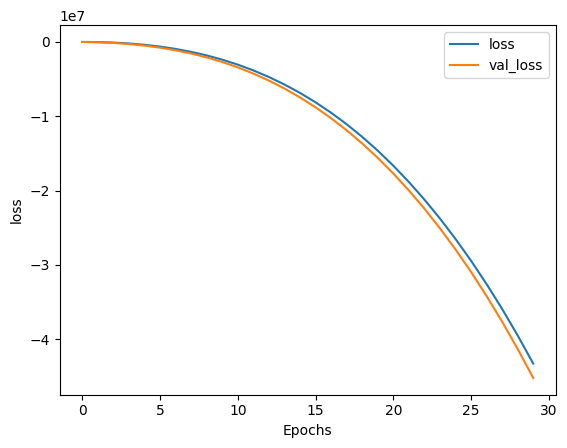

In [ ]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [ ]:
analyzer = SentimentIntensityAnalyzer()

In [ ]:
scores= dataset['Sub-issue'].apply(lambda x: analyzer.polarity_scores(x))
scores.head()

0    {'neg': 0.237, 'neu': 0.263, 'pos': 0.5, 'comp...
1    {'neg': 0.145, 'neu': 0.532, 'pos': 0.323, 'co...
2    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
3    {'neg': 0.343, 'neu': 0.657, 'pos': 0.0, 'comp...
4    {'neg': 0.455, 'neu': 0.545, 'pos': 0.0, 'comp...
Name: Sub-issue, dtype: object

In [ ]:
dataset = pd.concat([dataset,scores.apply(pd.Series)],axis= 1)
dataset

,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Consumer consent provided?,Company response to consumer,Timely response?,Rating,neg,neu,pos,compound
0,Credit card or prepaid card,General-purpose credit card or charge card,"Other features, terms, or problems",Problem with rewards from credit card,I had three credit cards with Barclays. An UBE...,Company has responded to the consumer and the ...,Consent provided,Closed with monetary relief,Yes,4,0.237,0.263,0.500,0.4588
1,Credit card or prepaid card,Store credit card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,I purchased furniture from Macy 's. The produc...,Company has responded to the consumer and the ...,Consent provided,Closed with monetary relief,Yes,4,0.145,0.532,0.323,0.3968
2,Checking or savings account,Checking account,Managing an account,Deposits and withdrawals,I deposited a {$800.00} check to Chase from my...,Company has responded to the consumer and the ...,Consent provided,Closed with explanation,Yes,5,0.000,1.000,0.000,0.0000
3,Debt collection,Credit card debt,Attempts to collect debt not owed,Debt was already discharged in bankruptcy and ...,Id like to file a complaint against Bank of Am...,Company has responded to the consumer and the ...,Consent provided,Closed with explanation,Yes,5,0.343,0.657,0.000,-0.5719
4,Debt collection,Other debt,Attempts to collect debt not owed,Debt is not yours,I Have contacted Credit Bureaus on numerous oc...,Company has responded to the consumer and the ...,Consent provided,Closed with explanation,Yes,5,0.455,0.545,0.000,-0.3612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45957,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,The debt collector is attempting to collect a ...,Company has responded to the consumer and the ...,Consent provided,Closed with explanation,Yes,5,0.455,0.545,0.000,-0.3612
45958,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,"Monday, XX/XX/2020 at approximately XXXX XXXX ...",Company has responded to the consumer and the ...,Consent provided,Closed with explanation,Yes,5,0.351,0.649,0.000,-0.4019
45959,Debt collection,Other debt,Attempts to collect debt not owed,Debt was result of identity theft,I called Credit Control Corp and explained tha...,Company believes it acted appropriately as aut...,Consent provided,Closed with explanation,Yes,5,0.333,0.667,0.000,-0.3612
45960,Mortgage,Conventional home mortgage,Trouble during payment process,Debt is not yours,This company is a nightmare with the escrow ac...,Company has responded to the consumer and the ...,Consent provided,Closed with explanation,Yes,5,0.455,0.545,0.000,-0.3612


In [ ]:

df2 = dataset.T.drop_duplicates().T
df2 = pd.DataFrame(df2)



In [ ]:
df2

,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Consumer consent provided?,Company response to consumer,Timely response?,Rating,neg,neu,pos,compound
0,Credit card or prepaid card,General-purpose credit card or charge card,"Other features, terms, or problems",Problem with rewards from credit card,I had three credit cards with Barclays. An UBE...,Company has responded to the consumer and the ...,Consent provided,Closed with monetary relief,Yes,4,0.237,0.263,0.5,0.4588
1,Credit card or prepaid card,Store credit card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,I purchased furniture from Macy 's. The produc...,Company has responded to the consumer and the ...,Consent provided,Closed with monetary relief,Yes,4,0.145,0.532,0.323,0.3968
2,Checking or savings account,Checking account,Managing an account,Deposits and withdrawals,I deposited a {$800.00} check to Chase from my...,Company has responded to the consumer and the ...,Consent provided,Closed with explanation,Yes,5,0.0,1.0,0.0,0.0
3,Debt collection,Credit card debt,Attempts to collect debt not owed,Debt was already discharged in bankruptcy and ...,Id like to file a complaint against Bank of Am...,Company has responded to the consumer and the ...,Consent provided,Closed with explanation,Yes,5,0.343,0.657,0.0,-0.5719
4,Debt collection,Other debt,Attempts to collect debt not owed,Debt is not yours,I Have contacted Credit Bureaus on numerous oc...,Company has responded to the consumer and the ...,Consent provided,Closed with explanation,Yes,5,0.455,0.545,0.0,-0.3612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45957,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,The debt collector is attempting to collect a ...,Company has responded to the consumer and the ...,Consent provided,Closed with explanation,Yes,5,0.455,0.545,0.0,-0.3612
45958,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,"Monday, XX/XX/2020 at approximately XXXX XXXX ...",Company has responded to the consumer and the ...,Consent provided,Closed with explanation,Yes,5,0.351,0.649,0.0,-0.4019
45959,Debt collection,Other debt,Attempts to collect debt not owed,Debt was result of identity theft,I called Credit Control Corp and explained tha...,Company believes it acted appropriately as aut...,Consent provided,Closed with explanation,Yes,5,0.333,0.667,0.0,-0.3612
45960,Mortgage,Conventional home mortgage,Trouble during payment process,Debt is not yours,This company is a nightmare with the escrow ac...,Company has responded to the consumer and the ...,Consent provided,Closed with explanation,Yes,5,0.455,0.545,0.0,-0.3612


In [ ]:
df2.rename(columns = {'compound':'Overall Sentiment Score'},inplace= True)
df2

,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Consumer consent provided?,Company response to consumer,Timely response?,Rating,neg,neu,pos,Overall Sentiment Score
0,Credit card or prepaid card,General-purpose credit card or charge card,"Other features, terms, or problems",Problem with rewards from credit card,I had three credit cards with Barclays. An UBE...,Company has responded to the consumer and the ...,Consent provided,Closed with monetary relief,Yes,4,0.237,0.263,0.5,0.4588
1,Credit card or prepaid card,Store credit card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,I purchased furniture from Macy 's. The produc...,Company has responded to the consumer and the ...,Consent provided,Closed with monetary relief,Yes,4,0.145,0.532,0.323,0.3968
2,Checking or savings account,Checking account,Managing an account,Deposits and withdrawals,I deposited a {$800.00} check to Chase from my...,Company has responded to the consumer and the ...,Consent provided,Closed with explanation,Yes,5,0.0,1.0,0.0,0.0
3,Debt collection,Credit card debt,Attempts to collect debt not owed,Debt was already discharged in bankruptcy and ...,Id like to file a complaint against Bank of Am...,Company has responded to the consumer and the ...,Consent provided,Closed with explanation,Yes,5,0.343,0.657,0.0,-0.5719
4,Debt collection,Other debt,Attempts to collect debt not owed,Debt is not yours,I Have contacted Credit Bureaus on numerous oc...,Company has responded to the consumer and the ...,Consent provided,Closed with explanation,Yes,5,0.455,0.545,0.0,-0.3612
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45957,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,The debt collector is attempting to collect a ...,Company has responded to the consumer and the ...,Consent provided,Closed with explanation,Yes,5,0.455,0.545,0.0,-0.3612
45958,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,"Monday, XX/XX/2020 at approximately XXXX XXXX ...",Company has responded to the consumer and the ...,Consent provided,Closed with explanation,Yes,5,0.351,0.649,0.0,-0.4019
45959,Debt collection,Other debt,Attempts to collect debt not owed,Debt was result of identity theft,I called Credit Control Corp and explained tha...,Company believes it acted appropriately as aut...,Consent provided,Closed with explanation,Yes,5,0.333,0.667,0.0,-0.3612
45960,Mortgage,Conventional home mortgage,Trouble during payment process,Debt is not yours,This company is a nightmare with the escrow ac...,Company has responded to the consumer and the ...,Consent provided,Closed with explanation,Yes,5,0.455,0.545,0.0,-0.3612


In [ ]:
df2['Sentiment_Type'] = df2['Overall Sentiment Score'].apply(lambda c:'Positive' if c>0 else 'Negative')


In [ ]:
dataset_1 = df2.loc[:,['Sub-issue','Overall Sentiment Score','Sentiment_Type']]
dataset_1.head(30)

,Sub-issue,Overall Sentiment Score,Sentiment_Type
0,Problem with rewards from credit card,0.4588,Positive
1,Credit card company isn't resolving a dispute ...,0.3968,Positive
2,Deposits and withdrawals,0.0,Negative
3,Debt was already discharged in bankruptcy and ...,-0.5719,Negative
4,Debt is not yours,-0.3612,Negative
5,Debt is not yours,-0.3612,Negative
6,Problem using a debit or ATM card,-0.4019,Negative
7,Received bad information about your loan,-0.5423,Negative
8,Debt is not yours,-0.3612,Negative
9,Problem with customer service,-0.4019,Negative


In [ ]:
df2['Company response to consumer'].unique()

array(['Closed with monetary relief', 'Closed with explanation',
       'Closed with non-monetary relief', 'Untimely response',
       'In progress'], dtype=object)

In [ ]:
mapping = {
    'Closed with monetary relief': 4,
    'Closed with explanation': 5,
    'Closed with non-monetary relief':3,
    'Untimely response': 1,
    'In progress': 2
}
df2['Rating'] = df2['Company response to consumer'].map(mapping)

In [ ]:
df2


,Product,Sub-product,Issue,Sub-issue,Consumer complaint narrative,Company public response,Consumer consent provided?,Company response to consumer,Timely response?,Rating,neg,neu,pos,Overall Sentiment Score,Sentiment_Type
0,Credit card or prepaid card,General-purpose credit card or charge card,"Other features, terms, or problems",Problem with rewards from credit card,I had three credit cards with Barclays. An UBE...,Company has responded to the consumer and the ...,Consent provided,Closed with monetary relief,Yes,4,0.237,0.263,0.5,0.4588,Positive
1,Credit card or prepaid card,Store credit card,Problem with a purchase shown on your statement,Credit card company isn't resolving a dispute ...,I purchased furniture from Macy 's. The produc...,Company has responded to the consumer and the ...,Consent provided,Closed with monetary relief,Yes,4,0.145,0.532,0.323,0.3968,Positive
2,Checking or savings account,Checking account,Managing an account,Deposits and withdrawals,I deposited a {$800.00} check to Chase from my...,Company has responded to the consumer and the ...,Consent provided,Closed with explanation,Yes,5,0.0,1.0,0.0,0.0,Negative
3,Debt collection,Credit card debt,Attempts to collect debt not owed,Debt was already discharged in bankruptcy and ...,Id like to file a complaint against Bank of Am...,Company has responded to the consumer and the ...,Consent provided,Closed with explanation,Yes,5,0.343,0.657,0.0,-0.5719,Negative
4,Debt collection,Other debt,Attempts to collect debt not owed,Debt is not yours,I Have contacted Credit Bureaus on numerous oc...,Company has responded to the consumer and the ...,Consent provided,Closed with explanation,Yes,5,0.455,0.545,0.0,-0.3612,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45957,Debt collection,I do not know,Attempts to collect debt not owed,Debt is not yours,The debt collector is attempting to collect a ...,Company has responded to the consumer and the ...,Consent provided,Closed with explanation,Yes,5,0.455,0.545,0.0,-0.3612,Negative
45958,Checking or savings account,Checking account,Managing an account,Problem using a debit or ATM card,"Monday, XX/XX/2020 at approximately XXXX XXXX ...",Company has responded to the consumer and the ...,Consent provided,Closed with explanation,Yes,5,0.351,0.649,0.0,-0.4019,Negative
45959,Debt collection,Other debt,Attempts to collect debt not owed,Debt was result of identity theft,I called Credit Control Corp and explained tha...,Company believes it acted appropriately as aut...,Consent provided,Closed with explanation,Yes,5,0.333,0.667,0.0,-0.3612,Negative
45960,Mortgage,Conventional home mortgage,Trouble during payment process,Debt is not yours,This company is a nightmare with the escrow ac...,Company has responded to the consumer and the ...,Consent provided,Closed with explanation,Yes,5,0.455,0.545,0.0,-0.3612,Negative


In [ ]:
dataset_2 = df2.loc[:,['Sub-issue','Overall Sentiment Score','Sentiment_Type','Rating',]]
dataset_2.head(30)

,Sub-issue,Overall Sentiment Score,Sentiment_Type,Rating
0,Problem with rewards from credit card,0.4588,Positive,4
1,Credit card company isn't resolving a dispute ...,0.3968,Positive,4
2,Deposits and withdrawals,0.0,Negative,5
3,Debt was already discharged in bankruptcy and ...,-0.5719,Negative,5
4,Debt is not yours,-0.3612,Negative,5
5,Debt is not yours,-0.3612,Negative,3
6,Problem using a debit or ATM card,-0.4019,Negative,3
7,Received bad information about your loan,-0.5423,Negative,5
8,Debt is not yours,-0.3612,Negative,5
9,Problem with customer service,-0.4019,Negative,5


In [ ]:
pd.crosstab(dataset_2['Rating'],dataset_2['Sentiment_Type'])

Sentiment_Type,Negative,Positive
Rating,,
1,377,9
2,1,0
3,3312,279
4,3080,764
5,35268,2872
